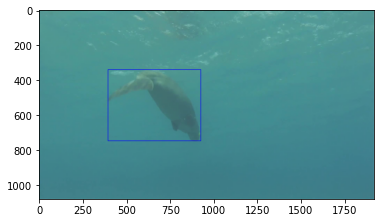

In [19]:
#import bbox_visualizer as bbv
from matplotlib import pyplot as plt
#from PIL import Image
import cv2

img = cv2.imread('test/GOT-10k_Test_000001/00000001.jpg')
with open('test/tracking_results/stark_st/baseline_got10k_only/GOT-10k_Test_000001.txt', 'r') as f:
    bboxes = f.readlines()
[x, y, w, h] = bboxes[0].split('\t')
x = int(x)
y = int(y)
x2 = int(w)+x
y2 = int(h[:-1])+y
#bbv.draw_rectangle(img, [x, y, x2, y2])

image_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.rectangle(image_BGR, (x,y), (x2, y2), color=(0,0,255), thickness=2)
#save_path = os.path.join(self.save_dir, "%04d.jpg" % self.frame_id)
plt.imshow(image_BGR)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.show()

In [1]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image
def draw_box(img, box):
    [x, y, w, h] = box.split('\t')
    x = int(x)
    y = int(y)
    x2 = int(w)+x
    y2 = int(h[:-1])+y

    #image_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.rectangle(img, (x,y), (x2, y2), color=(0,0,255), thickness=2)
    image_BGR = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return image_BGR


In [5]:
import glob
import imageio
import cv2
images = glob.glob('/home/ella/projects/mfmot/STARK/data/robot-data/data_RGB/auto-dish/YellowDish-9-7-22-17-53/*.png')
images.sort(key=lambda f: f[-8:-4])
#print(images)
with open('/home/ella/projects/mfmot/STARK/data/robot-data/data_RGB/auto-dish/YellowDish-9-7-22-17-53/groundtruth.txt', 'r') as f:
    bboxes = f.readlines()

imgarray = []
for i in range(len(images)):
    img = cv2.imread(images[i])#'../robot-data/2/frame_0003.jpg')
    imgarray.append(Image.fromarray(draw_box(img, bboxes[i])))
imageio.mimsave('/home/ella/projects/mfmot/MixFormer/test/tracking_results/mixformer_online/baseline_1k_trek/P29-P29_03-8.gif',imgarray, fps=33)

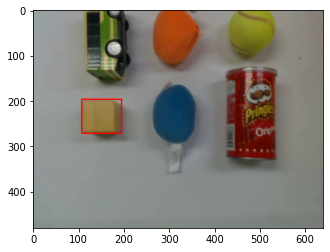

In [5]:
import glob
import imageio
import cv2
images = glob.glob('/home/ella/projects/mfmot/STARK/data/robot-data/data_RGB/auto/BeigeCube-8-23-18-35-7/*.png')
images.sort(key=lambda f: f[-8:-4])
#print(images)
# with open('/home/ella/projects/mfmot/STARK/data/robot-data/data_RGB/auto/BeigeCube-8-23-18-32-29/groundtruth.txt', 'r') as f:
#     bboxes = f.readlines()
with open('/home/ella/projects/mfmot/STARK/test/tracking_results/exotst_tracker/baseline_mix/auto/BeigeCube-8-23-18-35-7.txt', 'r') as f:
    bboxes = f.readlines()
number = 88

# images = glob.glob('/home/ella/projects/mfmot/MixFormer/data/TREK-150/P29/P29-P29_03-8/img/*.jpg')
# images.sort(key=lambda f: f[-8:-4])
# #img = Image.open(images[number])
img = cv2.imread(images[number])
plt.imshow(draw_box(img, bboxes[number]))
#plt.imshow(img)
plt.show()
#plt.savefig('/home/ella/projects/mfmot/MixFormer/test/P29-P29_03-8/0_ori.jpg')
#plt.savefig('/home/ella/projects/mfmot/MixFormer/test/P29-P29_03-8/240.jpg')

In [3]:
!pip install imageio

     |████████████████████████████████| 3.3 MB 14.2 MB/s eta 0:00:01


In [6]:
import glob
file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/*_neg_threshold.txt')
file2_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_sim/EXOTST_ep0060/*/*_neg_threshold.txt')
hist = []
for i in range(len(file_path)):
    with open(file_path[i], 'r') as f:
        a = float(f.read().splitlines()[0].split('\t')[-1][1:-1])
        hist.append(a)

robot = []
for i in range(len(file2_path)):
    with open(file2_path[i], 'r') as f:
        a = float(f.read().splitlines()[0].split('\t')[-1][1:-1])
        robot.append(a)

In [7]:
import numpy as np
m = np.mean(np.array(hist))
r = np.mean(np.array(robot))
print(m, r)

0.43431899071428576 0.5786540991666667


In [9]:
import glob
file_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0035/*_neg_threshold.txt')
file2_path = glob.glob('test/tracking_results/exotst_tracker/baseline_mix_enc/EXOTST_ep0035/*/*_neg_threshold.txt')
hist = []
for i in range(len(file_path)):
    with open(file_path[i], 'r') as f:
        a = float(f.read().splitlines()[0].split('\t')[-1][1:-1])
        hist.append(a)

robot = []
for i in range(len(file2_path)):
    with open(file2_path[i], 'r') as f:
        a = float(f.read().splitlines()[0].split('\t')[-1][1:-1])
        robot.append(a)

import numpy as np
m = np.mean(np.array(hist))
r = np.mean(np.array(robot))
print(m, r)

4.970193642142858 nan


/home/hskim/miniconda/envs/deformable_detr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/hskim/miniconda/envs/deformable_detr/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
